## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
print(images)

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    print(ret)
    #cv2.imshow('img',img)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
         
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
       # cv2.imshow('img',img)
        #cv2.waitKey(500)
        
       
       

cv2.destroyAllWindows()




['camera_cal\\calibration1.jpg', 'camera_cal\\calibration10.jpg', 'camera_cal\\calibration11.jpg', 'camera_cal\\calibration12.jpg', 'camera_cal\\calibration13.jpg', 'camera_cal\\calibration14.jpg', 'camera_cal\\calibration15.jpg', 'camera_cal\\calibration16.jpg', 'camera_cal\\calibration17.jpg', 'camera_cal\\calibration18.jpg', 'camera_cal\\calibration19.jpg', 'camera_cal\\calibration2.jpg', 'camera_cal\\calibration20.jpg', 'camera_cal\\calibration3.jpg', 'camera_cal\\calibration4.jpg', 'camera_cal\\calibration5.jpg', 'camera_cal\\calibration6.jpg', 'camera_cal\\calibration7.jpg', 'camera_cal\\calibration8.jpg', 'camera_cal\\calibration9.jpg']
False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True


## 2、Apply a distortion correction to raw images

Text(0.5,1,'Undistorted Image')

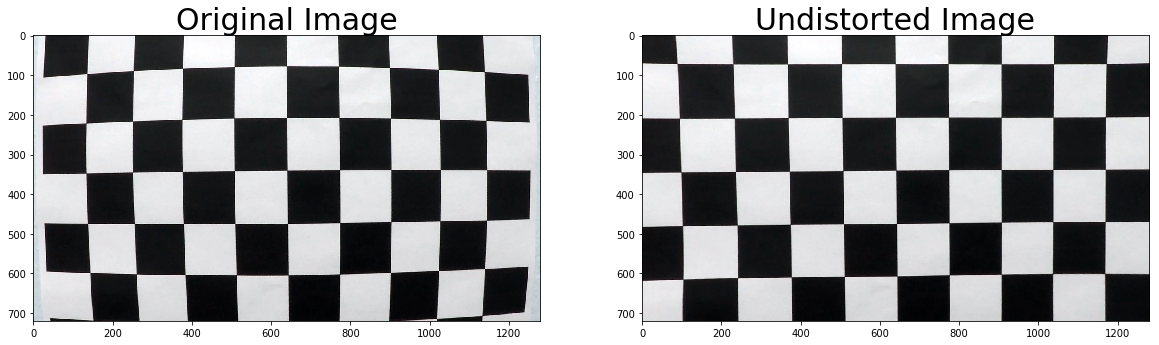

In [7]:
import pickle
%matplotlib inline

img = cv2.imread('C:\\Users\\w2764\\CarND-Advanced-Lane-Lines-master\\camera_cal\\calibration1.jpg')
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:2], None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
#cv2.imshow('imgss',dst)
#cv2.waitKey(500)
#cv2.imwrite('test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## 3、Use color transforms, gradients, etc., to create a thresholded binary image.

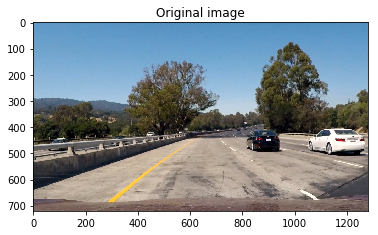

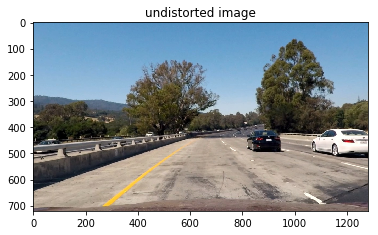

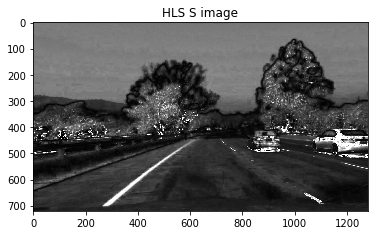

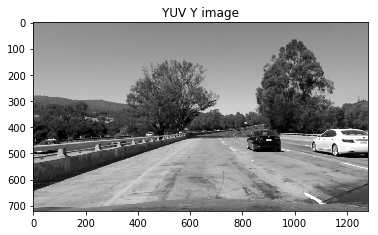

In [8]:
import preprocess
import matplotlib.image as mpimg

image1 = mpimg.imread('test_images/test1.jpg')
fig00  = plt.figure(); ax00 = fig00.add_subplot(1,1,1)
plt.title('Original image')
ax00.imshow(image1, cmap='gray')


image = cv2.undistort(image1, mtx, dist, None, mtx)
fig0  = plt.figure(); ax0 = fig0.add_subplot(1,1,1)
plt.title('undistorted image')
ax0.imshow(image, cmap='gray')


binary = preprocess.HLStogray(image)
fig  = plt.figure(); ax = fig.add_subplot(1,1,1)
plt.title('HLS S image')
ax.imshow(binary, cmap='gray')

binary1 = preprocess.YUVtogray(image)
fig1  = plt.figure(); ax1 = fig1.add_subplot(1,1,1)
plt.title('YUV Y image')
ax1.imshow(binary1, cmap='gray')

## 4、Apply a perspective transform to rectify binary image ("birds-eye view").

[[[ 253  720]
  [ 600  453]
  [ 706  453]
  [1200  720]]]


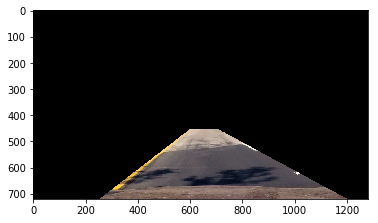

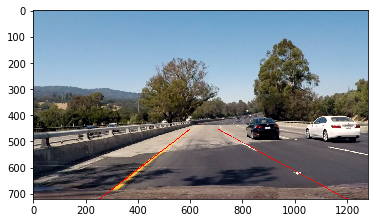

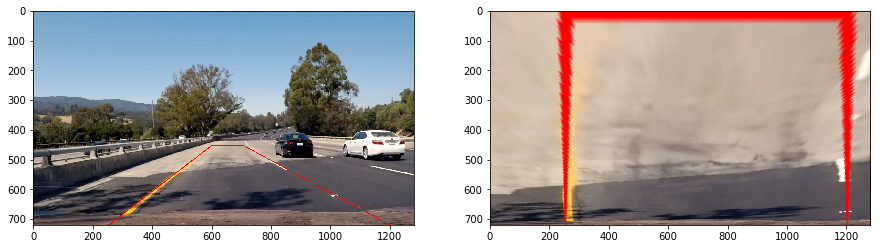

In [9]:
nx = 0 # the number of inside corners in x
ny = 0 # the number of inside corners in y
# Next we'll create a masked edges image using cv2.fillPoly()

image = mpimg.imread('test_images/test4.jpg')

mask = np.zeros_like(image)   
ignore_mask_color =  [255,255,255]  

# This time we are defining a four sided polygon to mask
imshape = image.shape
point1 = [int(190/960*imshape[1]),imshape[0]]
point2 = [int(450/960*imshape[1]), int(340/540*imshape[0])]
point3 = [int(530/960*imshape[1]),int(340/540*imshape[0])]
point4 = [int(900/960*imshape[1]),imshape[0]]

vertices = np.array([[ point1, point2, point3, point4 ]],
                    dtype=np.int32)
print(vertices)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(image, mask)

fig10  = plt.figure(); ax10 = fig10.add_subplot(1,1,1)
ax10.imshow(masked_edges , cmap='gray')

cv2.line(image,tuple(point1),tuple(point2),(255,0,0),2)
cv2.line(image,tuple(point2),tuple(point3),(255,0,0),2)
cv2.line(image,tuple(point3),tuple(point4),(255,0,0),2)
fig11  = plt.figure(); ax11 = fig11.add_subplot(1,1,1)
ax11.imshow(image , cmap='gray')


warped,Minv = preprocess.perspective_image(image)

fig8,(ax8,ax9)   =plt.subplots(1, 2, figsize=(15,10)) #ax8 = fig8.add_subplot(1,1,1)
ax8.imshow(image, cmap='gray')
ax9.imshow(warped, cmap='gray')

## 5、Detect lane pixels and fit to find the lane boundary.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


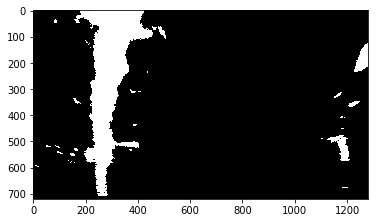

In [10]:
image = mpimg.imread('test_images/test4.jpg')
ksize = 3

image1,Minv = preprocess.perspective_image(image)
ss = preprocess.extract_image(image1, ksize)
print(ss)
plt.imshow(ss)


binary_warped = ss
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
#out_img = np.array(out_img  ,dtype = np.uint8)
out_img = out_img.astype(np.uint8)
hh=cv2.cvtColor(out_img, cv2.COLOR_HLS2RGB)
plt.imshow(hh)


## 6、Determine the curvature of the lane and vehicle position with respect to center.

(720, 0)

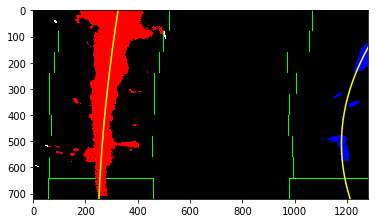

In [11]:
# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
binary_warped = ss
import draw_line
out_img,left_fit,right_fit =draw_line.find_line_binary(binary_warped)
plt.imshow(out_img)
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')

plt.xlim(0, 1280)
plt.ylim(720, 0)

(720, 0)

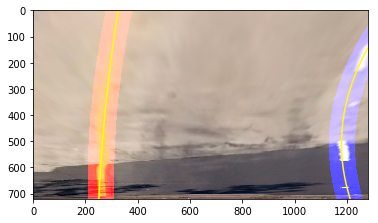

In [12]:

result1, leftx, lefty,rightx,righty = draw_line.find_line_color(binary_warped,image1,left_fit,right_fit)
plt.imshow(result1)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)



## 7、Warp the detected lane boundaries back onto the original image.

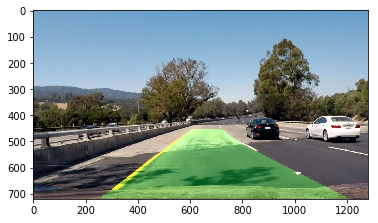

In [13]:
def return_line2image(image,left_fit,right_fit, Minv):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(image[:,:,0])
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    color_warp = color_warp.astype(np.uint8)
    # Recast the x and y points into usable format for cv2.fillPoly()
    # Generate x and y values for plotting
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))], dtype=np.int32)
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))], dtype=np.int32)
    pts = np.hstack((pts_left, pts_right))

    pts = pts.astype(np.int32)
    # Draw the lane onto the warped blank image

    #print(pts)
    '''
    a3 = np.array( [[[10,10],[100,10],[100,40],[10,100],[10,140]]], dtype=np.int32 )
    im = np.zeros([240,320,3],dtype=np.uint8)
    cv2.fillPoly( im, a3, 255 )

    print(a3)
    plt.imshow(im)
    plt.show()
    '''


    cv2.fillPoly(color_warp, pts, (0,255, 0))

    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0]))
    result = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
    return result
result = return_line2image(image,left_fit,right_fit, Minv)
plt.imshow(result)


## 8、Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

1280
20.567136973625857
98.79849152409903


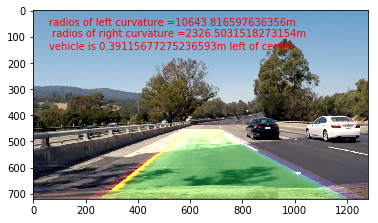

In [26]:
newwarp = cv2.warpPerspective(result1, Minv, (image.shape[1], image.shape[0]))
result2 = cv2.addWeighted(result, 1, newwarp, 0.3, 0)

#ploty=result.shape[0]
#left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
#right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

#print(right_fitx - left_fitx)
def visual_display(image, leftx, lefty,rightx,righty):
    y_eval= image.shape[0]
    #print(y_eval)

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 80/(720) # meters per pixel in y dimension
    xm_per_pix = 3.7/(1000) # meters per pixel in x dimension

    print(result.shape[1])
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

    ploty=result.shape[0]
    left_fitx = left_fit_cr[0]*ploty**2 + left_fit_cr[1]*ploty + left_fit_cr[2]
    right_fitx = right_fit_cr[0]*ploty**2 + right_fit_cr[1]*ploty + right_fit_cr[2]
    return left_fitx,right_fitx,left_curverad,right_curverad
left_fitx,right_fitx,left_curverad,right_curverad =visual_display(image, leftx, lefty,rightx,righty)
print(left_fitx)
print(right_fitx)

plt.text(60, 100,'radios of left curvature ='+str(left_curverad)+'m \n radios of right curvature ='+str(right_curverad)+'m ',color="red")
plt.text(60, 150,'vehicle is '+ str((right_fitx - left_fitx)/2/100)+'m left of center',color="red")
plt.imshow(result2)

## 9、Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position in video.

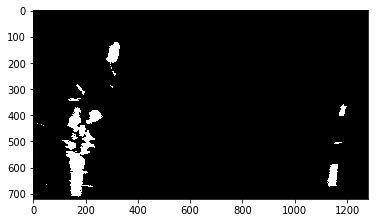

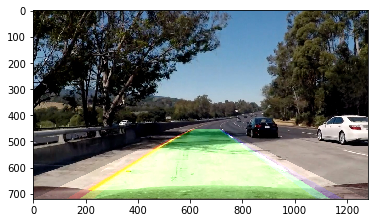

In [10]:
import matplotlib.pyplot as plt
def Lane_Finding_Pipeline(image):
    
    image1,Minv = preprocess.perspective_image(image)

    
    image2 = preprocess.extract_image(image1, ksize)
 
       
    fig10  = plt.figure(); ax10 = fig10.add_subplot(1,1,1)
    ax10.imshow(image2 , cmap='gray')
    
    out_img,left_fit,right_fit =draw_line.find_line_binary(image2)
    image3, leftx, lefty,rightx,righty = draw_line.find_line_color(image2,image1,left_fit,right_fit)
    
    image4 = return_line2image(image,left_fit,right_fit, Minv)
    newwarp = cv2.warpPerspective(image3, Minv, (image.shape[1], image.shape[0]))
    result2 = cv2.addWeighted(image4, 1, newwarp, 0.3, 0)
    
    #left_fitx,right_fitx,left_curverad,right_curverad =visual_display(image4, leftx, lefty,rightx,righty)
    
    return result2
image = mpimg.imread('test_images/test5.jpg')
result2 =Lane_Finding_Pipeline(image)
plt.imshow(result2)

In [11]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    result = Lane_Finding_Pipeline(image)
    return result

In [ ]:
white_output = 'C:/Users/w2764/CarND-Advanced-Lane-Lines-master/project_video_result.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("C:/Users/w2764/CarND-Advanced-Lane-Lines-master/project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video C:/Users/w2764/CarND-Advanced-Lane-Lines-master/project_video_result.mp4
[MoviePy] Writing video C:/Users/w2764/CarND-Advanced-Lane-Lines-master/project_video_result.mp4



 11%|████████▍                                                                      | 135/1261 [00:46<06:16,  2.99it/s]


 21%|████████████████▉                                                              | 271/1261 [01:33<05:38,  2.92it/s]


 32%|█████████████████████████▍                                                     | 407/1261 [02:20<04:55,  2.89it/s]


 43%|██████████████████████████████████                                             | 543/1261 [03:07<04:26,  2.70it/s]


 54%|██████████████████████████████████████████▌                                    | 679/1261 [03:54<04:46,  2.03it/s]


 65%|███████████████████████████████████████████████████                            | 815/1261 [04:44<02:38,  2.81it/s]


 75%|███████████████████████████████████████████████████████████▌                   | 951/1261 [05:36<01:51,  2.77it/s]


 86%|███████████████████████████████████████████████████████████████████▏          | 1087/1261 [06:28<01:13,  2.36it/s]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [07:18<00:13,  2.76it/s]


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [07:31<00:00,  2.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: C:/Users/w2764/CarND-Advanced-Lane-Lines-master/project_video_result.mp4 

Wall time: 7min 32s
